Список доступных столбцов:
1. team1
2. team2
3. possession team1
4. possession team2
5. possession in contest
6. number of goals team1
7. number of goals team2
8. date
9. hour
10. category
11. total attempts team1
12. total attempts team2
13. conceded team1
14. conceded team2
15. goal inside the penalty area team1
16. goal inside the penalty area team2
17. goal outside the penalty area team1
18. goal outside the penalty area team2
19. assists team1
20. assists team2
21. on target attempts team1
22. on target attempts team2
23. off target attempts team1
24. off target attempts team2
25. attempts inside the penalty area team1
26. attempts inside the penalty area  team2
27. attempts outside the penalty area  team1
28. attempts outside the penalty area  team2
29. left channel team1
30. left channel team2
31. left inside channel team1
32. left inside channel team2
33. central channel team1
34. central channel team2
35. right inside channel team1
36. right inside channel team2
37. right chan

C:\Users\User\AppData\Local\Temp\ipykernel_39760\2178983603.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)


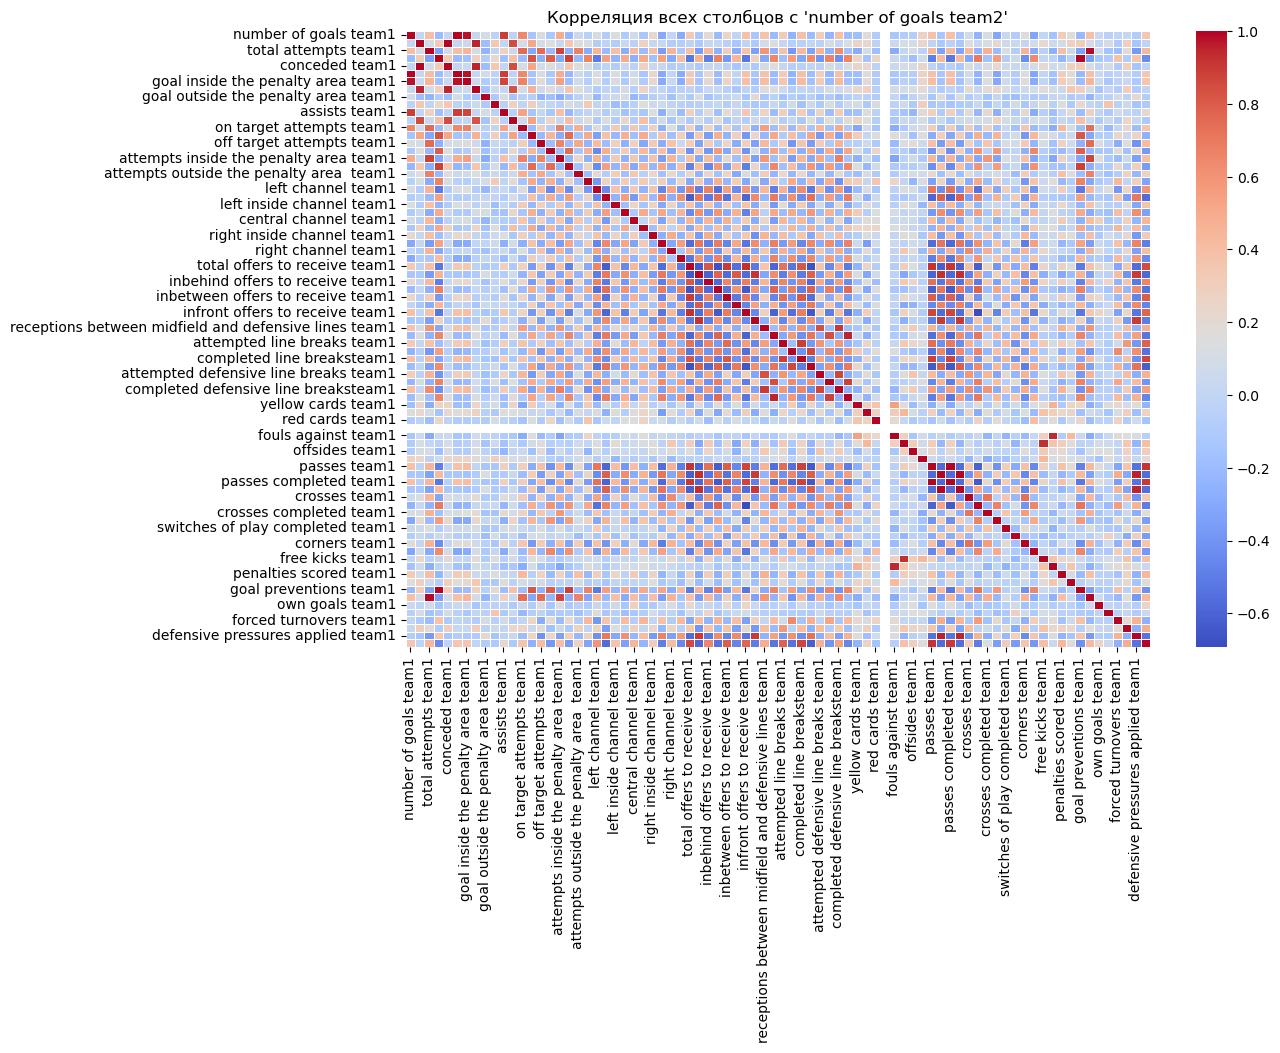


Корреляция всех столбцов с 'number of goals team2':
conceded team1                                           1.000000
number of goals team2                                    1.000000
goal inside the penalty area team2                       0.948861
assists team2                                            0.854118
on target attempts team2                                 0.519323
attempts inside the penalty area  team2                  0.351702
goal outside the penalty area team2                      0.345724
total attempts team2                                     0.326235
goal preventions team1                                   0.314953
forced turnovers team2                                   0.298999
penalties scored team2                                   0.283393
central channel team2                                    0.273231
yellow cards team1                                       0.246377
offsides team2                                           0.228208
yellow cards team2     

C:\Users\User\AppData\Local\Temp\ipykernel_39760\2178983603.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_with_target = data.corr()[target_column].sort_values(ascending=False)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Шаг 1: Загрузка данных
data = pd.read_csv('Fifa_world_cup_matches.csv')  # Замените 'Fifa_world_cup_matches.csv' на имя вашего файла данных

# Шаг 2: Вывод списка доступных столбцов и выбор целевой переменной
print("Список доступных столбцов:")
for i, column in enumerate(data.columns, 1):
    print(f"{i}. {column}")

target_column_number = int(input("Введите номер целевой переменной из списка выше: ")) - 1
target_column = data.columns[target_column_number]

# Установка опции Pandas для вывода максимального числа строк и столбцов
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Визуализация корреляции с помощью графика
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title(f"Корреляция всех столбцов с '{target_column}'")
plt.show()

# Шаг 3: Вывод корреляции всех столбцов с выбранной целевой переменной
correlations_with_target = data.corr()[target_column].sort_values(ascending=False)

print(f"\nКорреляция всех столбцов с '{target_column}':")
print(correlations_with_target)

# Шаг 4: Выбор автоматических предикторов на основе корреляции (исключая целевую переменную)
correlations = correlations_with_target.abs().sort_values(ascending=False)
top_predictors = list(correlations.index[correlations.index != target_column][:3])

if not top_predictors:
    print(f"Нет других предикторов с корреляцией по отношению к '{target_column}'")
else:
    print(f"\nТоп-3 предикторов с наибольшей корреляцией (кроме '{target_column}'):")
    for i, predictor in enumerate(top_predictors, 1):
        print(f"{i}. {predictor}")
        
# Шаг 5: Предварительная обработка данных
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns)

# Шаг 6: Разделение данных на признаки (X) и целевую переменную (y)
X = data[top_predictors]
y = data[target_column]

# Шаг 7: Разделение данных на тренировочный и тестовый наборы (80% на 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Шаг 8: Обучение и оценка модели для каждого предиктора
results = {}

for feature in top_predictors:
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)
    y_pred = model.predict(X_test[[feature]])
    r2 = r2_score(y_test, y_pred)
    results[feature] = r2

# Вывод результатов
print("\nR^2 Score для каждого предиктора:")
for feature, r2 in results.items():
    print(f"{feature}: {r2:.4f}")
